In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv("../data/illegal_dumping_daily.csv")

In [21]:
df_with_zcta = pd.read_csv("../data/illegal_dumping_data_with_zcta.csv")

In [22]:
df_with_zcta.rename(columns={'ZCTA5CE20': 'zip_code'}, inplace=True)

In [23]:
df

,day,cnt
0,2016-01-10,1
1,2016-01-11,43
2,2016-01-12,40
3,2016-01-13,40
4,2016-01-14,32
...,...,...
3524,2025-09-14,17
3525,2025-09-15,118
3526,2025-09-16,101
3527,2025-09-17,99


In [24]:
df['day'] = pd.to_datetime(df['day'])
df = df.sort_values('day')

In [25]:
print(df.head())
print(df.tail())
print(df.isna().sum())

         day  cnt
0 2016-01-10    1
1 2016-01-11   43
2 2016-01-12   40
3 2016-01-13   40
4 2016-01-14   32
            day  cnt
3524 2025-09-14   17
3525 2025-09-15  118
3526 2025-09-16  101
3527 2025-09-17   99
3528 2025-09-18   49
day    0
cnt    0
dtype: int64


In [26]:
# set daily index (fill missing days with 0)
ts = (df.set_index('day')['cnt']
        .asfreq('D', fill_value=0))

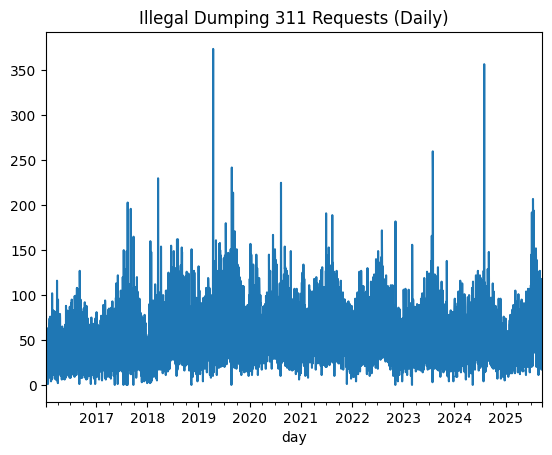

In [27]:
# quick plots
ts.plot(title='Illegal Dumping 311 Requests (Daily)')
plt.show()

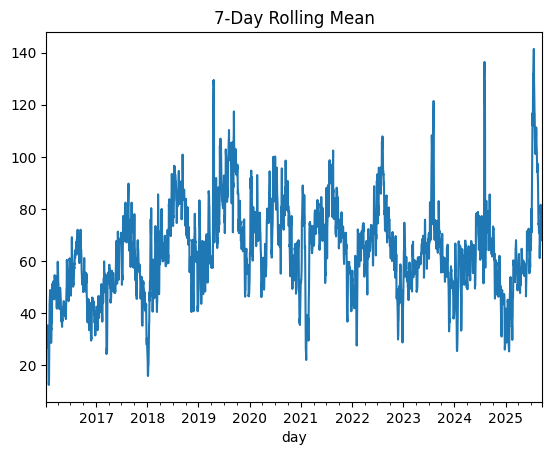

In [28]:
ts.rolling(7).mean().plot(title='7-Day Rolling Mean')
plt.show()

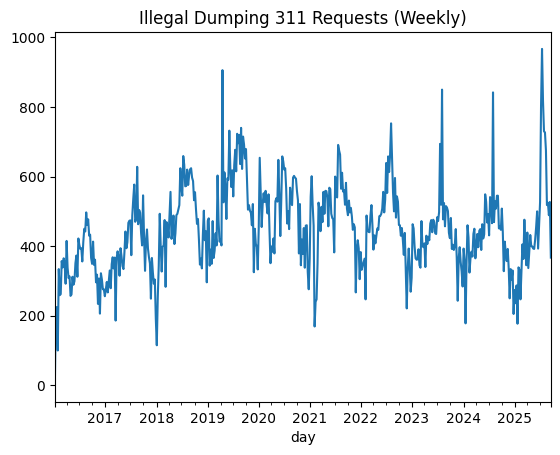

In [29]:
# aggregate to weekly (often smoother for forecasting)
ts_w = ts.resample('W').sum()
ts_w.plot(title='Illegal Dumping 311 Requests (Weekly)')
plt.show()

Filtered data contains 2449 rows from 2019-01-01 to 2025-09-18


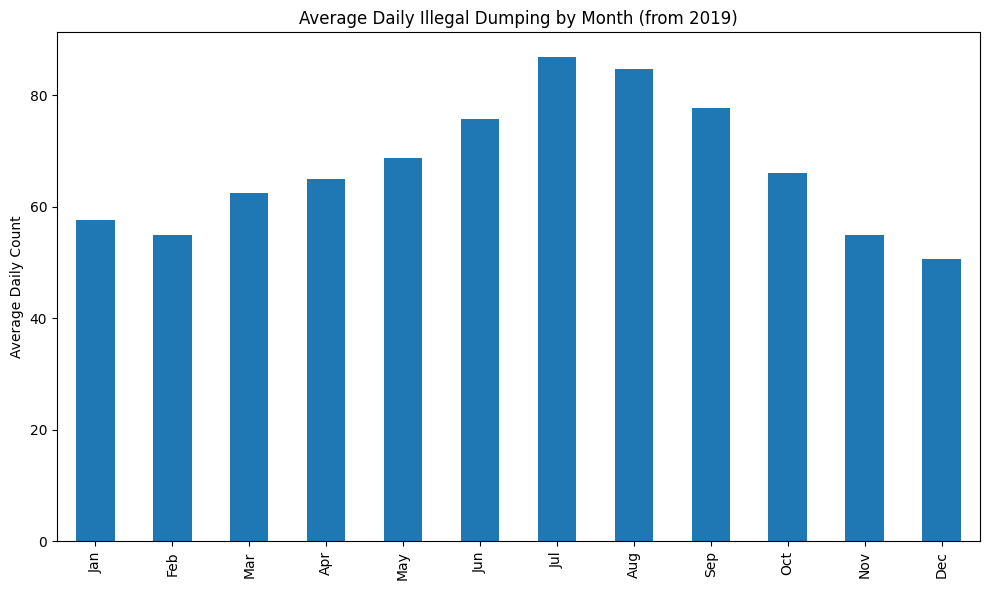

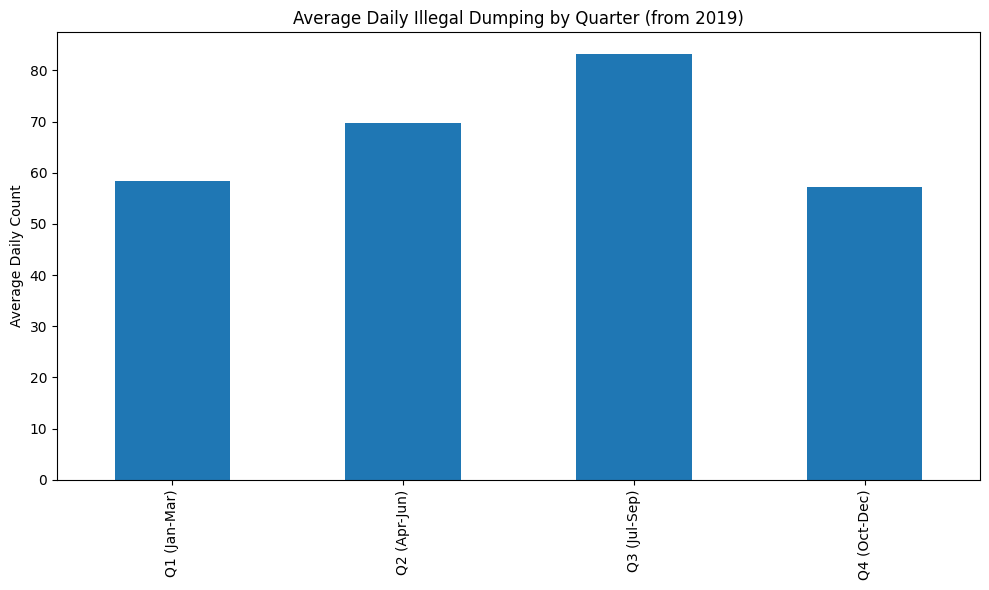

In [30]:
# Filter data from January 2019 onwards
df_filtered = df[df['day'] >= '2019-01-01']

# Display the filtered dataframe
print(f"Filtered data contains {len(df_filtered)} rows from {df_filtered['day'].min().date()} to {df_filtered['day'].max().date()}")

ts_filtered = (df_filtered.set_index('day')['cnt']
               .asfreq('D', fill_value=0))

# Create a month-based seasonal view
# Group by month and calculate average count per month
monthly_avg = ts_filtered.groupby(ts_filtered.index.month).mean()
monthly_avg.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_avg.plot(kind='bar', figsize=(10, 6), title='Average Daily Illegal Dumping by Month (from 2019)')
plt.ylabel('Average Daily Count')
plt.tight_layout()
plt.show()

# Create a seasonal view by quarter
quarterly_avg = ts_filtered.groupby(ts_filtered.index.quarter).mean()
quarterly_avg.index = ['Q1 (Jan-Mar)', 'Q2 (Apr-Jun)', 'Q3 (Jul-Sep)', 'Q4 (Oct-Dec)']
quarterly_avg.plot(kind='bar', figsize=(10, 6), title='Average Daily Illegal Dumping by Quarter (from 2019)')
plt.ylabel('Average Daily Count')
plt.tight_layout()
plt.show()

2022 Data Points: 365
Date Range: 2022-01-01 to 2022-12-31
Average Daily Count: 65.84
Max Daily Count: 182 on 2022-11-07
Min Daily Count: 0 on 2022-11-06


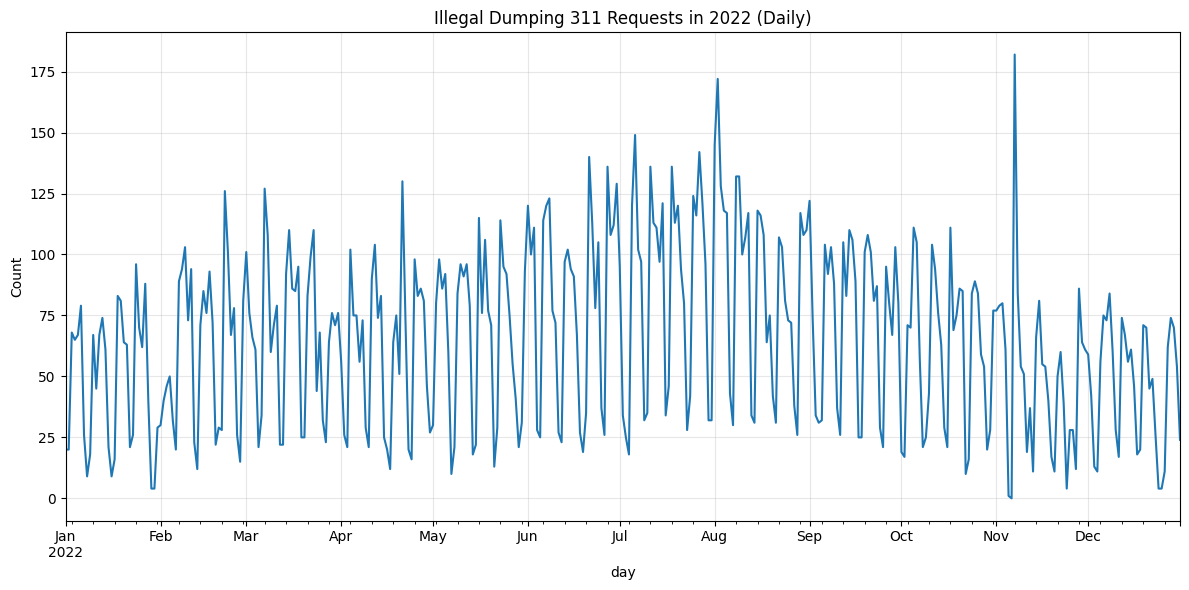

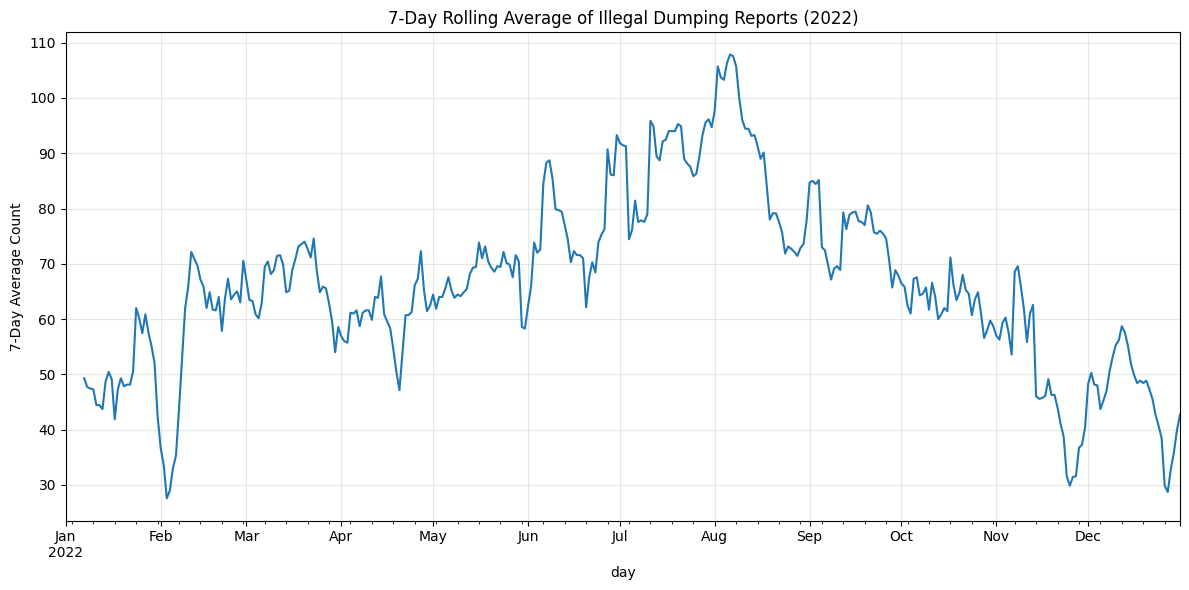

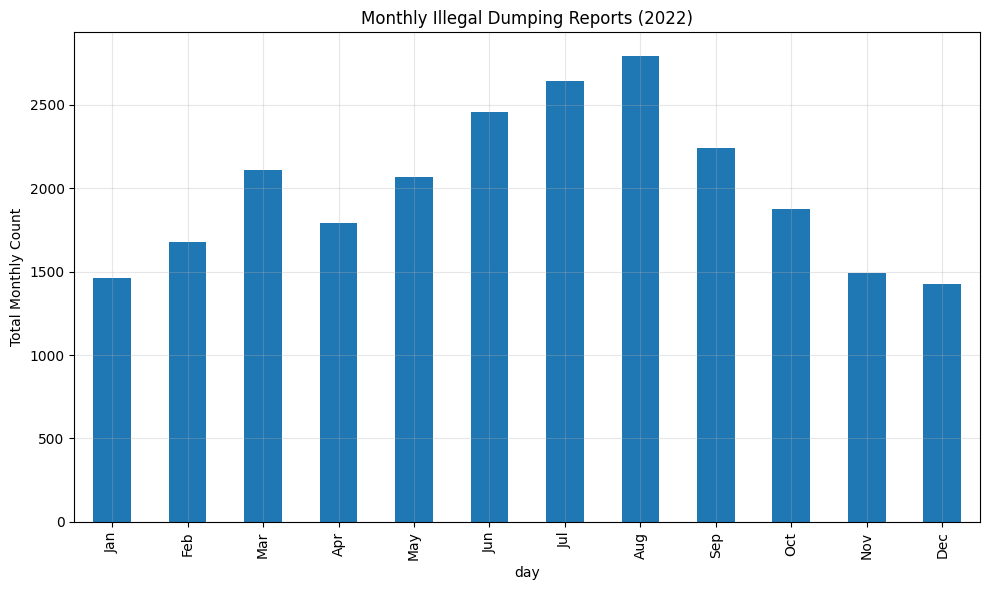

In [31]:
# Filter data for user-selected year
# No need to import exception, we can raise ValueError directly

user_selected_year = input("Enter year to analyze (e.g., 2024): ")
user_selected_year = int(user_selected_year) if user_selected_year.isdigit() else ValueError("Invalid year input.")
# If we get here, the conversion was successful
ts_year = ts[ts.index.year == user_selected_year]
# Display basic statistics
print(f"{user_selected_year} Data Points: {len(ts_year)}")
if not ts_year.empty:
	print(f"Date Range: {ts_year.index.min().date()} to {ts_year.index.max().date()}")
	print(f"Average Daily Count: {ts_year.mean():.2f}")
	print(f"Max Daily Count: {ts_year.max()} on {ts_year.idxmax().date()}")
	print(f"Min Daily Count: {ts_year.min()} on {ts_year.idxmin().date()}")
if not ts_year.empty:
	# Plot daily data for selected year
	plt.figure(figsize=(12, 6))
	ts_year.plot(title=f'Illegal Dumping 311 Requests in {user_selected_year} (Daily)')
	plt.ylabel('Count')
	plt.grid(True, alpha=0.3)
	plt.tight_layout()
	plt.show()

	# Plot 7-day rolling average for selected year
	plt.figure(figsize=(12, 6))
	ts_year.rolling(7).mean().plot(title=f'7-Day Rolling Average of Illegal Dumping Reports ({user_selected_year})')
	plt.ylabel('7-Day Average Count')
	plt.grid(True, alpha=0.3)
	plt.tight_layout()
	plt.show()

	# Monthly aggregation for selected year
	monthly_year = ts_year.resample('ME').sum()
	monthly_year.index = monthly_year.index.strftime('%b')
plt.figure(figsize=(10, 6))
monthly_year.plot(kind='bar', title=f'Monthly Illegal Dumping Reports ({user_selected_year})')
plt.ylabel('Total Monthly Count')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [32]:
filtered_df_with_zcta = df_with_zcta[df_with_zcta['GEOID20'] == 19140]

In [33]:
filtered_df_with_zcta.tail()

,day,srvccode,addr,agency_responsible,lat,lon,media_url,the_geom,cartodb_id,requested_datetime,...,zip_code,GEOID20,GEOIDFQ20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20
227714,2025-09-25T00:00:00Z,SR-ST02,4510 N LAWRENCE ST,Streets Department,40.019919,-75.133393,NaN,0101000020E6100000854DAB8389C852C0FF3A32B88C02...,4464227,2025-09-25T19:39:31Z,...,19140.0,19140.0,860Z200US19140,B5,G6350,S,8164407.0,0.0,40.012279,-75.145084
227737,2025-09-25T00:00:00Z,SR-ST02,3509 N AMERICAN ST,Streets Department,40.004081,-75.133882,NaN,0101000020E6100000BF105A8691C852C00C3EA3B98500...,3904091,2025-09-25T18:23:13Z,...,19140.0,19140.0,860Z200US19140,B5,G6350,S,8164407.0,0.0,40.012279,-75.145084
227781,2025-09-26T00:00:00Z,SR-ST02,3949 NICE ST,Streets Department,40.013606,-75.151517,NaN,0101000020E6100000391F2C76B2C952C030AA2BD8BD01...,5208121,2025-09-26T14:22:20Z,...,19140.0,19140.0,860Z200US19140,B5,G6350,S,8164407.0,0.0,40.012279,-75.145084
227785,2025-09-26T00:00:00Z,SR-ST02,3830 N 15TH ST,Streets Department,40.011795,-75.152484,NaN,0101000020E6100000691D4E4EC2C952C09EC51A7E8201...,5415614,2025-09-26T15:30:07Z,...,19140.0,19140.0,860Z200US19140,B5,G6350,S,8164407.0,0.0,40.012279,-75.145084
227828,2025-09-29T00:00:00Z,SR-ST02,1815 W BUTLER ST,Streets Department,40.011791,-75.157688,NaN,0101000020E610000067E4D88D17CA52C07744C05E8201...,1883214,2025-09-29T16:04:15Z,...,19140.0,19140.0,860Z200US19140,B5,G6350,S,8164407.0,0.0,40.012279,-75.145084


In [34]:
print(filtered_df_with_zcta['day'].dtype)
print(filtered_df_with_zcta['day'].head(10))

object
1      2016-01-11T00:00:00Z
5      2016-01-11T00:00:00Z
56     2016-01-12T00:00:00Z
57     2016-01-12T00:00:00Z
64     2016-01-12T00:00:00Z
68     2016-01-12T00:00:00Z
73     2016-01-12T00:00:00Z
97     2016-01-13T00:00:00Z
104    2016-01-13T00:00:00Z
108    2016-01-13T00:00:00Z
Name: day, dtype: object


In [35]:
# 1) Parse strings -> timezone-aware datetimes (UTC)
filtered_df_with_zcta["day"] = pd.to_datetime(
    filtered_df_with_zcta["day"], utc=True, errors="coerce"
)

# 2) Make tz-naive (drop timezone) and normalize to midnight
filtered_df_with_zcta["day"] = (
    filtered_df_with_zcta["day"]
      .dt.tz_localize(None)   # now dtype is datetime64[ns] (naive)
      .dt.normalize()         # 00:00:00 time
)

# 3) Quick sanity check
print(filtered_df_with_zcta["day"].dtype)  # should be datetime64[ns]
print(filtered_df_with_zcta["day"].min(), filtered_df_with_zcta["day"].max())

filtered_df_with_zcta = filtered_df_with_zcta.sort_values("day")


datetime64[ns]
2016-01-11 00:00:00 2025-09-29 00:00:00


C:\Users\rhuntley\AppData\Local\Temp\ipykernel_29664\2981870799.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_with_zcta["day"] = pd.to_datetime(
C:\Users\rhuntley\AppData\Local\Temp\ipykernel_29664\2981870799.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_with_zcta["day"] = (


In [36]:
filtered_df_with_zcta["date"] = filtered_df_with_zcta["day"].dt.strftime("%Y-%m-%d")


In [37]:
print("Earliest Date:", filtered_df_with_zcta['date'].min())
print("Most Recent Date", filtered_df_with_zcta['date'].max())

Earliest Date: 2016-01-11
Most Recent Date 2025-09-29


In [38]:
filtered_df_with_zcta

,day,srvccode,addr,agency_responsible,lat,lon,media_url,the_geom,cartodb_id,requested_datetime,...,GEOID20,GEOIDFQ20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,date
1,2016-01-11,SR-ST02,GERMANTOWN AVE & W LYCOMING ST,Streets Department,40.014427,-75.153071,NaN,0101000020E6100000A14248E9CBC952C0DC0B88C0D801...,5317293,2016-01-11T17:50:27Z,...,19140.0,860Z200US19140,B5,G6350,S,8164407.0,0.0,40.012279,-75.145084,2016-01-11
5,2016-01-11,SR-ST02,1929 W ATLANTIC ST,Streets Department,40.008071,-75.160660,NaN,0101000020E6100000570EBE4148CA52C063F912760801...,5316117,2016-01-11T16:03:13Z,...,19140.0,860Z200US19140,B5,G6350,S,8164407.0,0.0,40.012279,-75.145084,2016-01-11
56,2016-01-12,SR-ST02,900 W WESTMORELAND ST,Streets Department,40.002231,-75.145216,https://d17aqltn7cihbm.cloudfront.net/uploads/...,0101000020E6100000523F46394BC952C0FED879184900...,5363466,2016-01-12T18:04:54Z,...,19140.0,860Z200US19140,B5,G6350,S,8164407.0,0.0,40.012279,-75.145084,2016-01-12
57,2016-01-12,SR-ST02,3760 N 10TH ST,Streets Department,40.009771,-75.144026,NaN,0101000020E610000013C459B937C952C0219542314001...,5363019,2016-01-12T17:14:21Z,...,19140.0,860Z200US19140,B5,G6350,S,8164407.0,0.0,40.012279,-75.145084,2016-01-12
64,2016-01-12,SR-ST02,3400 N 19TH ST,Streets Department,40.005827,-75.160158,NaN,0101000020E6100000BEA8CD0540CA52C007537AF4BE00...,5363678,2016-01-12T18:46:18Z,...,19140.0,860Z200US19140,B5,G6350,S,8164407.0,0.0,40.012279,-75.145084,2016-01-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227714,2025-09-25,SR-ST02,4510 N LAWRENCE ST,Streets Department,40.019919,-75.133393,NaN,0101000020E6100000854DAB8389C852C0FF3A32B88C02...,4464227,2025-09-25T19:39:31Z,...,19140.0,860Z200US19140,B5,G6350,S,8164407.0,0.0,40.012279,-75.145084,2025-09-25
227737,2025-09-25,SR-ST02,3509 N AMERICAN ST,Streets Department,40.004081,-75.133882,NaN,0101000020E6100000BF105A8691C852C00C3EA3B98500...,3904091,2025-09-25T18:23:13Z,...,19140.0,860Z200US19140,B5,G6350,S,8164407.0,0.0,40.012279,-75.145084,2025-09-25
227785,2025-09-26,SR-ST02,3830 N 15TH ST,Streets Department,40.011795,-75.152484,NaN,0101000020E6100000691D4E4EC2C952C09EC51A7E8201...,5415614,2025-09-26T15:30:07Z,...,19140.0,860Z200US19140,B5,G6350,S,8164407.0,0.0,40.012279,-75.145084,2025-09-26
227781,2025-09-26,SR-ST02,3949 NICE ST,Streets Department,40.013606,-75.151517,NaN,0101000020E6100000391F2C76B2C952C030AA2BD8BD01...,5208121,2025-09-26T14:22:20Z,...,19140.0,860Z200US19140,B5,G6350,S,8164407.0,0.0,40.012279,-75.145084,2025-09-26


In [39]:
filtered_df_with_zcta.rename(columns={'ZCTA5CE20': 'zip_code'}, inplace=True)

In [40]:
filtered_df_with_zcta['zip_code'] = filtered_df_with_zcta['zip_code'].astype(str).apply(lambda x: x.replace('.0',''))

In [41]:
filtered_df_with_zcta['zip_code'].size

14217

In [42]:
df_with_zcta

,day,srvccode,addr,agency_responsible,lat,lon,media_url,the_geom,cartodb_id,requested_datetime,...,zip_code,GEOID20,GEOIDFQ20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20
0,2016-01-10T00:00:00Z,SR-ST02,FRONTENAC ST & OXFORD AVE,Streets Department,40.034791,-75.087159,https://d17aqltn7cihbm.cloudfront.net/uploads/...,0101000020E610000076F6C50394C552C044995A0A7404...,5308016,2016-01-10T23:47:33Z,...,19149.0,19149.0,860Z200US19149,B5,G6350,S,6182875.0,0.0,40.037830,-75.065542
1,2016-01-11T00:00:00Z,SR-ST02,GERMANTOWN AVE & W LYCOMING ST,Streets Department,40.014427,-75.153071,NaN,0101000020E6100000A14248E9CBC952C0DC0B88C0D801...,5317293,2016-01-11T17:50:27Z,...,19140.0,19140.0,860Z200US19140,B5,G6350,S,8164407.0,0.0,40.012279,-75.145084
2,2016-01-11T00:00:00Z,SR-ST02,2118 N PERCY ST,Streets Department,39.984246,-75.148487,NaN,0101000020E61000003811BFD080C952C053ECB5C3FBFD...,5316759,2016-01-11T19:10:34Z,...,19122.0,19122.0,860Z200US19122,B5,G6350,S,3349412.0,0.0,39.977710,-75.145722
3,2016-01-11T00:00:00Z,SR-ST02,S STANLEY ST & TASKER ST,Streets Department,39.933974,-75.195438,NaN,0101000020E6100000A238BE0F82CC52C07BCDF6778CF7...,5316307,2016-01-11T15:50:42Z,...,19146.0,19146.0,860Z200US19146,B5,G6350,S,4464988.0,218070.0,39.939496,-75.184146
4,2016-01-11T00:00:00Z,SR-ST02,300 SHAWMONT AVE,Streets Department,40.050317,-75.242694,NaN,0101000020E61000006A16574D88CF52C012CD08CA7006...,5316627,2016-01-11T18:37:23Z,...,19128.0,19128.0,860Z200US19128,B5,G6350,S,18091149.0,232522.0,40.049524,-75.230253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227862,2025-09-29T00:00:00Z,SR-ST02,2137 E LIPPINCOTT ST,Streets Department,39.990856,-75.109994,NaN,0101000020E6100000BBD139230AC752C0E283CC5ED4FE...,5271316,2025-09-29T12:08:02Z,...,19134.0,19134.0,860Z200US19134,B5,G6350,S,8925216.0,763239.0,39.989223,-75.108756
227863,2025-09-29T00:00:00Z,SR-ST02,cheltenham ave & massey wy,Streets Department,40.069165,-75.149935,NaN,0101000020E61000002C31B78898C952C0C3511C63DA08...,1859625,2025-09-29T15:49:41Z,...,19138.0,19138.0,860Z200US19138,B5,G6350,S,4569169.0,0.0,40.055957,-75.159485
227864,2025-09-29T00:00:00Z,SR-ST02,7052 W PASSYUNK AVE,Streets Department,39.913730,-75.235713,NaN,0101000020E61000002FB334ED15CF52C01F3DEC17F5F4...,1714469,2025-09-29T14:58:18Z,...,19142.0,19142.0,860Z200US19142,B5,G6350,S,4522112.0,23502.0,39.921752,-75.233279
227865,2025-09-29T00:00:00Z,SR-ST02,4219 MANTUA AVE,Streets Department,39.971974,-75.209177,NaN,0101000020E6100000E31CBB2663CD52C04D93EAA269FC...,2151591,2025-09-29T16:52:27Z,...,19104.0,19104.0,860Z200US19104,B5,G6350,S,7927199.0,323403.0,39.958518,-75.198856


In [43]:
df_with_zcta['zip_code'].value_counts()

zip_code
19134.0    19169
19140.0    14217
19146.0    12501
19148.0    10800
19132.0    10514
19143.0     9721
19145.0     9489
19147.0     9352
19121.0     9114
19124.0     8964
19120.0     8262
19139.0     7849
19144.0     7286
19125.0     7237
19133.0     6576
19131.0     5638
19104.0     5609
19130.0     5255
19122.0     4935
19142.0     4927
19141.0     4905
19138.0     4705
19123.0     4500
19107.0     3723
19135.0     3590
19103.0     2672
19151.0     2621
19149.0     2244
19153.0     1992
19152.0     1845
19136.0     1775
19106.0     1751
19111.0     1722
19126.0     1680
19119.0     1635
19137.0     1477
19128.0     1450
19129.0     1264
19150.0      805
19127.0      747
19154.0      691
19102.0      620
19116.0      590
19115.0      534
19114.0      531
19118.0      197
19108.0       11
19012.0        9
19109.0        6
19027.0        5
19112.0        3
19020.0        3
19006.0        2
19428.0        1
19083.0        1
19038.0        1
19096.0        1
19095.0        1
19066

In [44]:
daily_counts = filtered_df_with_zcta.groupby('date').size().reset_index(name='freq')


In [73]:
daily_counts.to_csv('daily_counts_illegal_dumping_hp.csv')

In [45]:
filtered_df_with_zcta

,day,srvccode,addr,agency_responsible,lat,lon,media_url,the_geom,cartodb_id,requested_datetime,...,GEOID20,GEOIDFQ20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,date
1,2016-01-11,SR-ST02,GERMANTOWN AVE & W LYCOMING ST,Streets Department,40.014427,-75.153071,NaN,0101000020E6100000A14248E9CBC952C0DC0B88C0D801...,5317293,2016-01-11T17:50:27Z,...,19140.0,860Z200US19140,B5,G6350,S,8164407.0,0.0,40.012279,-75.145084,2016-01-11
5,2016-01-11,SR-ST02,1929 W ATLANTIC ST,Streets Department,40.008071,-75.160660,NaN,0101000020E6100000570EBE4148CA52C063F912760801...,5316117,2016-01-11T16:03:13Z,...,19140.0,860Z200US19140,B5,G6350,S,8164407.0,0.0,40.012279,-75.145084,2016-01-11
56,2016-01-12,SR-ST02,900 W WESTMORELAND ST,Streets Department,40.002231,-75.145216,https://d17aqltn7cihbm.cloudfront.net/uploads/...,0101000020E6100000523F46394BC952C0FED879184900...,5363466,2016-01-12T18:04:54Z,...,19140.0,860Z200US19140,B5,G6350,S,8164407.0,0.0,40.012279,-75.145084,2016-01-12
57,2016-01-12,SR-ST02,3760 N 10TH ST,Streets Department,40.009771,-75.144026,NaN,0101000020E610000013C459B937C952C0219542314001...,5363019,2016-01-12T17:14:21Z,...,19140.0,860Z200US19140,B5,G6350,S,8164407.0,0.0,40.012279,-75.145084,2016-01-12
64,2016-01-12,SR-ST02,3400 N 19TH ST,Streets Department,40.005827,-75.160158,NaN,0101000020E6100000BEA8CD0540CA52C007537AF4BE00...,5363678,2016-01-12T18:46:18Z,...,19140.0,860Z200US19140,B5,G6350,S,8164407.0,0.0,40.012279,-75.145084,2016-01-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227714,2025-09-25,SR-ST02,4510 N LAWRENCE ST,Streets Department,40.019919,-75.133393,NaN,0101000020E6100000854DAB8389C852C0FF3A32B88C02...,4464227,2025-09-25T19:39:31Z,...,19140.0,860Z200US19140,B5,G6350,S,8164407.0,0.0,40.012279,-75.145084,2025-09-25
227737,2025-09-25,SR-ST02,3509 N AMERICAN ST,Streets Department,40.004081,-75.133882,NaN,0101000020E6100000BF105A8691C852C00C3EA3B98500...,3904091,2025-09-25T18:23:13Z,...,19140.0,860Z200US19140,B5,G6350,S,8164407.0,0.0,40.012279,-75.145084,2025-09-25
227785,2025-09-26,SR-ST02,3830 N 15TH ST,Streets Department,40.011795,-75.152484,NaN,0101000020E6100000691D4E4EC2C952C09EC51A7E8201...,5415614,2025-09-26T15:30:07Z,...,19140.0,860Z200US19140,B5,G6350,S,8164407.0,0.0,40.012279,-75.145084,2025-09-26
227781,2025-09-26,SR-ST02,3949 NICE ST,Streets Department,40.013606,-75.151517,NaN,0101000020E6100000391F2C76B2C952C030AA2BD8BD01...,5208121,2025-09-26T14:22:20Z,...,19140.0,860Z200US19140,B5,G6350,S,8164407.0,0.0,40.012279,-75.145084,2025-09-26


In [50]:
print(f"{daily_counts['freq'].sum():,}")

14,217


In [52]:
daily_counts

,date,freq
0,2016-01-11,2
1,2016-01-12,5
2,2016-01-13,4
3,2016-01-14,1
4,2016-01-15,1
...,...,...
2824,2025-09-23,3
2825,2025-09-24,4
2826,2025-09-25,3
2827,2025-09-26,2


In [57]:
# set daily index (fill missing days with 0)
tshp = (daily_counts.set_index('date')['freq']
        .asfreq('D', fill_value=0))

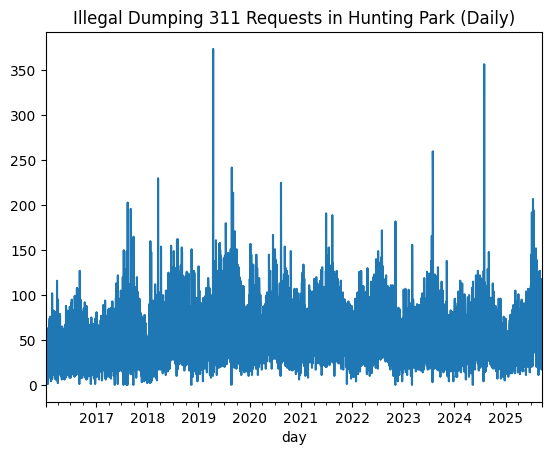

In [58]:
# quick plots
ts.plot(title='Illegal Dumping 311 Requests in Hunting Park (Daily)')
plt.show()